In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser

In [122]:
pd.set_option('display.max_rows', 100)

In [123]:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<br>

## Open data

In [124]:
source = pd.read_csv("./tables/table.csv",low_memory=False)

## Select clean data

In [125]:
data = source[source.missing == 0].reset_index(drop=True)
data['date'] = pd.to_datetime(data['date'])
data['year'] = data.date.dt.year
data['month'] = data.date.dt.month
data['year-month'] = data.date.dt.year.apply(str)+"-"+data.date.dt.month.apply(str)
data.to_csv("./tables/table_clean.csv", index = False)

In [126]:
data

source_leg  cadId legDes  type       date     id subtype  \
0                2    147     II  actP 1982-04-02  80353     ITG   
1                2    147     II   ini 1981-03-12  30469       J   
2                2    147     II   ini 1981-03-10  30461       J   
3                2    147     II   ini 1980-12-11  30367       J   
4                2    147     II   ini 1980-12-11  30366       J   
5                2    147     II   ini 1981-05-23  36067       C   
6                2    147     II   ini 1980-11-21  30938       F   
7                2    147     II   ini 1980-11-21  30935       F   
8                2    147     II   ini 1980-11-21  30932       F   
9                2    147     II   ini 1980-11-21  30931       F   
10               2    147     II   ini 1980-11-21  30930       F   
11               2    147     II   ini 1980-11-21  30927       F   
12               2    147     II   ini 1980-11-21  30925       F   
13               2    147     II   ini 1980-11-19  30908       F   
14               2    147     II   ini 1980-11-19  30905       F   
15               2    147     II   ini 1980-11-19  30903       F   
16               2    147     II   ini 1980-11-19  30899       F   
17               2    147     II   ini 1982-06-18  30726       J   
18               2    147     II   ini 1982-06-17  30724       J   
19               2    147     II   ini 1982-06-01  30683       J   
20               2    147     II   ini 1982-05-28  30680       J   
21               2    147     II   ini 1982-05-28  30679       J   
22               2    147     II   ini 1982-04-22  30654       J   
23               2    147     II   ini 1982-04-02  30649       J   
24               2    147     II   ini 1982-02-04  30665       J   
25               2    147     II   ini 1981-12-17  30619       J   
26               2    147     II   ini 1982-10-13  31174       F   
27               2    147     II   ini 1982-10-07  31162       F   
28               2    147     II   ini 1982-10-07  31173       F   
29               2    147     II   ini 1982-10-07  31172       F   
30               2    147     II   ini 1982-10-07  31171       F   
31               2    147     II   ini 1982-07-27  31148       F   
32               2    147     II   ini 1982-07-27  31147       F   
33               2    147     II   ini 1982-07-27  31146       F   
34               2    147     II   ini 1982-06-30  31129       F   
35               2    147     II   ini 1982-06-17  31112       F   
36               2    147     II   ini 1982-06-08  31103       F   
37               2    147     II   ini 1982-06-08  31102       F   
38               2    147     II   ini 1982-02-02  31050       F   
39               2    147     II   ini 1983-01-05  30764       J   
40               2    147     II   ini 1982-12-09  30761       J   
41               2    147     II   ini 1982-11-19  30754       J   
42               2    147     II   ini 1983-02-01  31196       F   
43               2    147     II   ini 1983-01-04  31188       F   
44               2   1205     II  actP 1982-02-19  80352     ITG   
45               2   1205     II   ini 1981-05-06  30507       J   
46               2   1205     II   ini 1981-01-30  30410       J   
47               2   1205     II   ini 1981-01-09  30494       J   
48               2   1205     II   ini 1981-06-09  33130       R   
49               2   1205     II   ini 1981-05-23  36067       C   
...            ...    ...    ...   ...        ...    ...     ...   
333143           7   1270    VII   ini 1996-03-15   5531       J   
333144           7   1270    VII   ini 1997-06-26   5027       J   
333145           7   1270    VII   ini 1997-05-16   5112       J   
333146           7   1270    VII   ini 1997-05-14   5122       J   
333147           7   1270    VII   ini 1997-05-14   5123       J   
333148           7   1270    VII   ini 1997-03-06   5236       J   
333149           7   1270    VII   ini 1998-05-26   4771       J

## Visualizations

### Requested

In [27]:
plt.figure()
data.groupby(["legDes",'type'])["type"].count().unstack().plot(kind='bar', stacked=False, figsize=(20, 10))
plt.title("Activities per Legislature", fontsize=20)
plt.ylabel("Number of Activities")
plt.xlabel("Legislature")
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

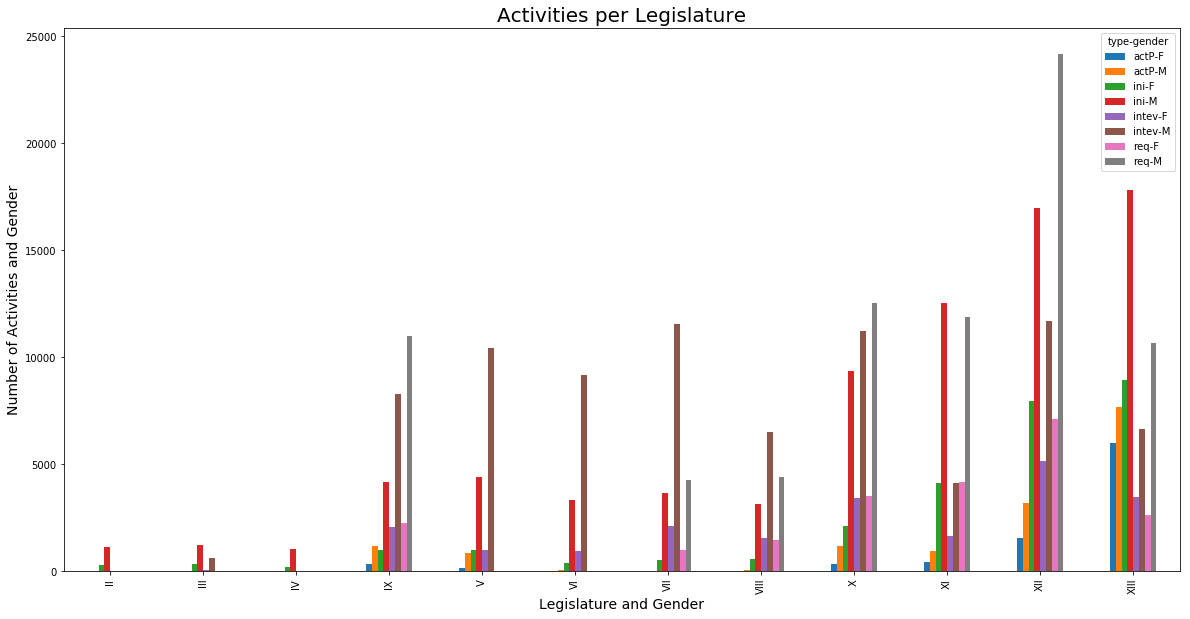

In [120]:
plt.figure()
data["type-gender"] = data['type'].apply(str)+"-"+data['cadSexo'].apply(str)
data.groupby(["legDes","type-gender"])["cadSexo"].count().unstack().plot(kind='bar', stacked=False, figsize=(20, 10))
plt.title("Activities per Legislature", fontsize=20)
plt.ylabel("Number of Activities and Gender")
plt.xlabel("Legislature and Gender")
plt.show()

<Figure size 432x288 with 0 Axes>

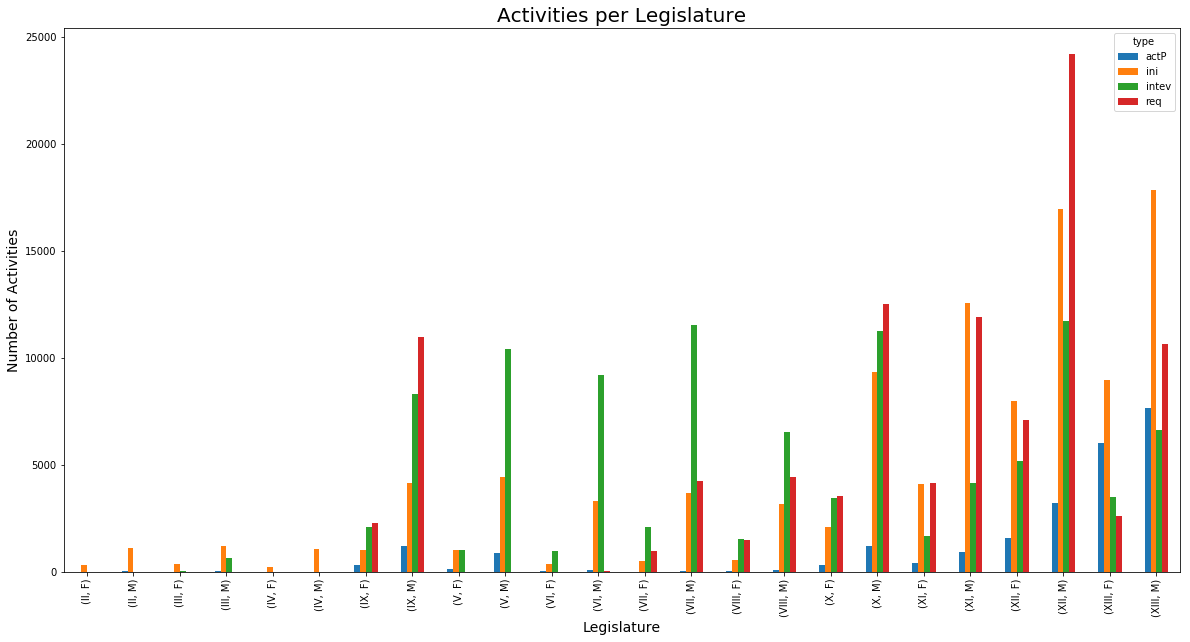

In [119]:
plt.figure()
data.groupby(["legDes","cadSexo",'type'])["type"].count().unstack().plot(kind='bar', stacked=False, figsize=(20, 10))
plt.title("Activities per Legislature", fontsize=20)
plt.ylabel("Number of Activities")
plt.xlabel("Legislature")
plt.show()

<Figure size 432x288 with 0 Axes>

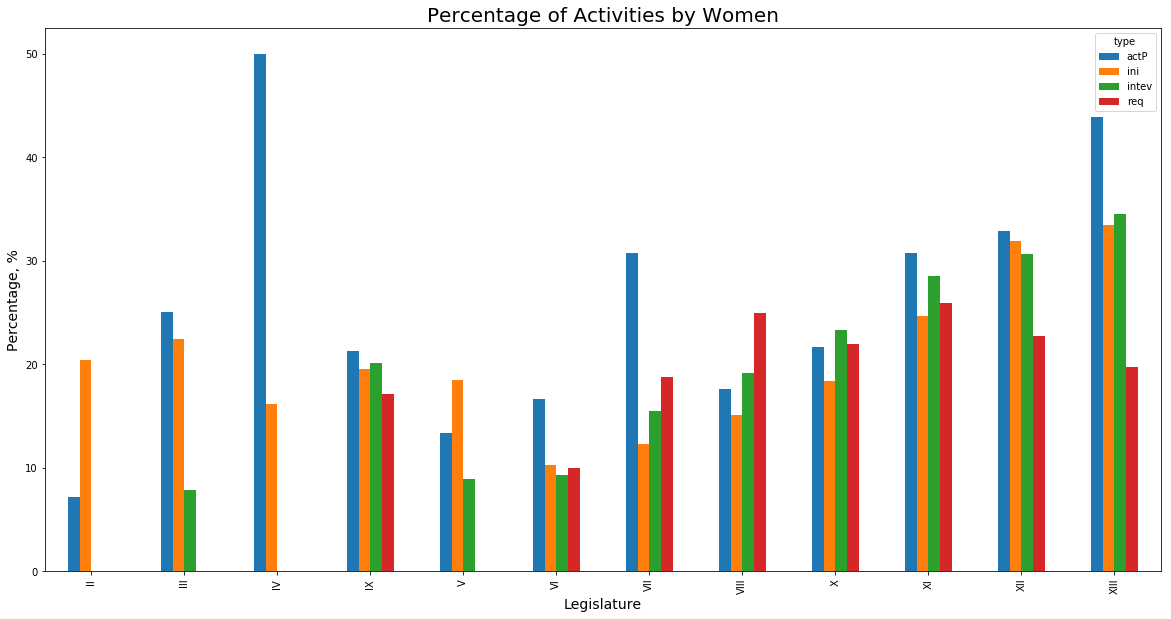

In [50]:
plt.figure()
(data[data.cadSexo == "F"].groupby(["legDes",'type']).type.count().unstack()/data.groupby(["legDes",'type']).type.count().unstack()*100).plot(kind='bar', stacked=False, figsize=(20, 10))
plt.title("Percentage of Activities by Women", fontsize=20)
plt.ylabel("Percentage, %")
plt.xlabel("Legislature")
plt.show()

### Other

In [10]:
plt.figure()
data.groupby(["date", "type"]).cadId.count().unstack().groupby(pd.Grouper(freq='M')).sum().plot(figsize=(20, 10))
plt.title("Activities in the Parliament", fontsize=20)
plt.ylabel("Number of Activities")
plt.xlabel("Date, Months")
plt.show()

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure()
data.groupby(['type','cadSexo'])['cadSexo'].count().unstack().plot(kind='bar', stacked=False, figsize=(20, 10))
plt.title("Activities per Gender", fontsize=20)
plt.ylabel("Number of Activities")
plt.xlabel("Activity Type")
plt.show()

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure()
df_FM = data.groupby(["year", "gpSigla", "cadSexo"]).cadId.count().unstack().copy()
df_FM["pc_F"] = df_FM.F / (df_FM.F+df_FM.M) * 100
df_FM.pc_F.unstack().plot(figsize=(20, 10))
plt.title("Women in the Parliament", fontsize=20)
plt.ylabel("Percentage of Women, %")
plt.xlabel("Date, Years")
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

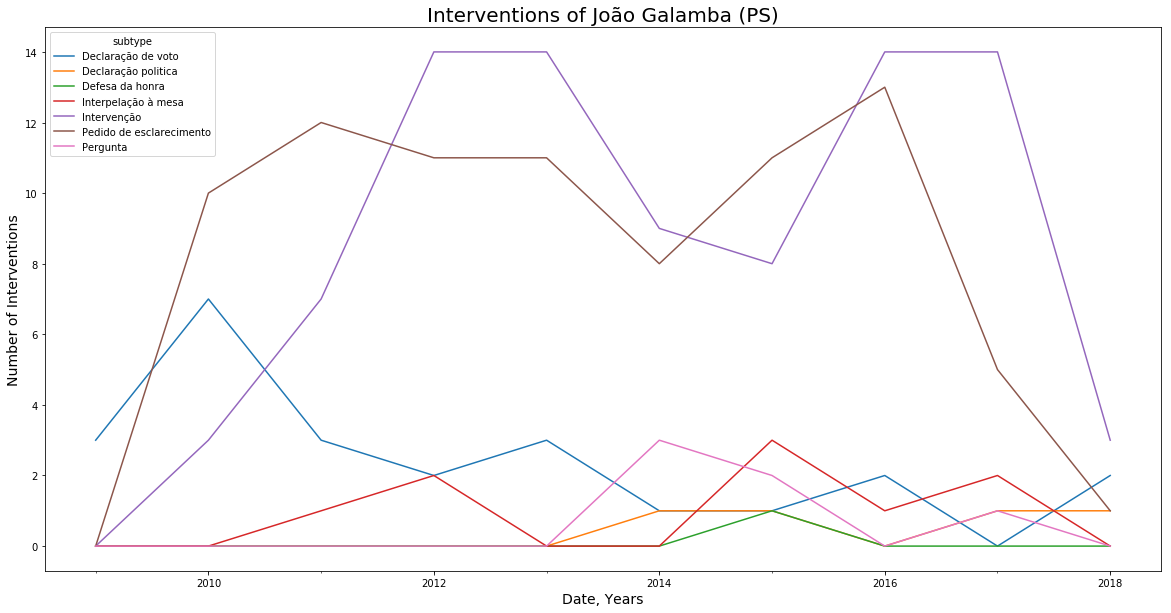

In [13]:
plt.figure()
data[(data.cadNomeCompleto == "JOÃO SALDANHA DE AZEVEDO GALAMBA") & (data.type == "intev")].groupby(["date", "subtype"]).id.count().unstack().groupby(pd.Grouper(freq='Y')).sum().plot(figsize=(20, 10))
plt.title("Interventions of João Galamba (PS)", fontsize=20)
plt.ylabel("Number of Interventions")
plt.xlabel("Date, Years")
plt.show()

<br>

# Missing Values

In [108]:
table_missing = source.groupby(["legDes", "type", "cadSexo", "missing"]).id.count().rename("% per leg")
pd.DataFrame(table_missing / table_missing.groupby(level=0).sum()*100)

% per leg
legDes type  cadSexo missing           
II     actP  F       0         0.018954
                     2         0.018954
             M       0         0.246399
                     1         0.037908
                     2         0.265353
       ini   F       0         5.477635
                     1         0.398029
                     2         6.690675
             M       0        21.379833
                     1         4.700531
                     2        58.718726
                     3         2.028052
       intev M       2         0.018954
III    actP  F       0         0.085499
                     2         0.051300
             M       0         0.256498
                     2         0.307798
       ini   F       0         5.984952
                     2         4.668263
             M       0        20.673735
                     1         0.701094
                     2        41.911765
       intev F       0         0.906293
                     2         0.512996
             M       0        10.584815
                     1         0.564295
                     2        12.790698
IV     actP  F       0         0.219720
                     2         0.054930
             M       0         0.219720
                     1         0.027465
                     2         0.439440
       ini   F       0         5.492996
                     2         2.746498
             M       0        28.563581
                     1         0.576765
                     2        61.191980
                     3         0.466905
IX     actP  F       0         1.053249
                     1         0.009783
             M       0         3.906479
                     1         0.052173
       ini   F       0         3.296703
                     1         0.048913
             M       0        13.581374
                     1         0.130433
                     2         0.016304
       intev F       0         6.828187
                     1         0.035869
             M       0        27.038837
...                                 ...
XI     actP  M       0         1.719942
                     1         0.036869
       ini   F       0         7.576596
                     1         0.490359
             M       0        23.151937
                     1         0.717104
       intev F       0         3.043542
                     1         0.134572
             M       0         7.637429
                     1         0.259927
       req   F       0         7.679829
                     1         6.249309
                     2         0.403716
             M       0        21.913136
                     1        17.752461
                     2         0.442429
XII    actP  F       0         1.495420
                     1         0.060882
             M       0         3.057429
                     1         0.045662
       ini   F       0         7.573178
                     1         0.839984
             M       0        16.144253
                     1         0.140790
       intev F       0         4.920045
                     1         0.307265
             M       0        11.143349
                     1         0.125570
       req   F       0         6.761732
                     1         7.370554
                     2         0.640215
             M       0        23.022041
                     1        16.210843
                     2         0.140790
XIII   actP  F       0         6.216269
                     1         0.287972
             M       0         7.936853
                     2         0.001036
       ini   F       0         9.275200
                     1         1.563131
             M       0        18.462351
       intev F       0         3.616230
                     1         0.309726
             M       0         6.873012
                     1         0.002072
       req   F       0         2.713985
                     1        12.353813
                     2        